# Support Vector Machines: Linear and Kernel
This notebook demonstrates:
- Linear SVM classification
- Kernel SVM (RBF kernel) classification

We use synthetic datasets and visualize decision boundaries.

In [1]:
# Import required libraries
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import make_classification, make_circles
from sklearn.svm import SVC
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

## Linear SVM

In [2]:
# Generate linearly separable data
X_lin, y_lin = make_classification(n_samples=200, n_features=2, n_redundant=0,
                                    n_informative=2, n_clusters_per_class=1, random_state=1)
X_train, X_test, y_train, y_test = train_test_split(X_lin, y_lin, test_size=0.3, random_state=42)

svc_linear = SVC(kernel='linear')
svc_linear.fit(X_train, y_train)
y_pred = svc_linear.predict(X_test)

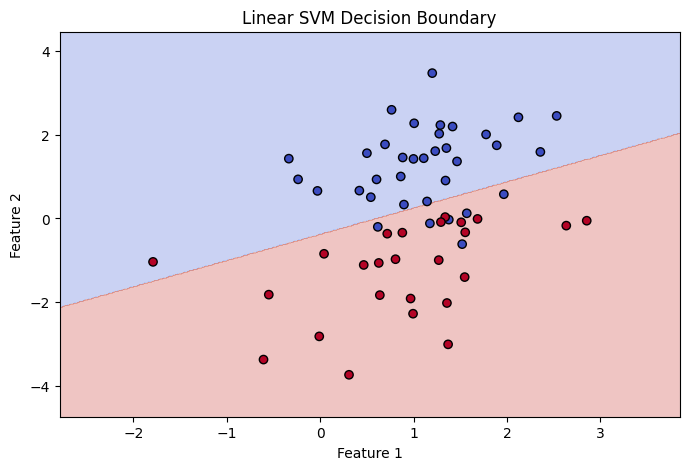

In [3]:
# Plot decision boundary for linear SVM
def plot_decision_boundary(clf, X, y, title):
    h = 0.02
    x_min, x_max = X[:, 0].min() - 1, X[:, 0].max() + 1
    y_min, y_max = X[:, 1].min() - 1, X[:, 1].max() + 1
    xx, yy = np.meshgrid(np.arange(x_min, x_max, h),
                         np.arange(y_min, y_max, h))
    Z = clf.predict(np.c_[xx.ravel(), yy.ravel()])
    Z = Z.reshape(xx.shape)
    plt.figure(figsize=(8, 5))
    plt.contourf(xx, yy, Z, alpha=0.3, cmap='coolwarm')
    plt.scatter(X[:, 0], X[:, 1], c=y, cmap='coolwarm', edgecolors='k')
    plt.title(title)
    plt.xlabel('Feature 1')
    plt.ylabel('Feature 2')
    plt.show()

plot_decision_boundary(svc_linear, X_test, y_test, 'Linear SVM Decision Boundary')

In [4]:
# Evaluate linear SVM
print('Accuracy:', accuracy_score(y_test, y_pred))
print('\nConfusion Matrix:\n', confusion_matrix(y_test, y_pred))
print('\nClassification Report:\n', classification_report(y_test, y_pred))

Accuracy: 0.8833333333333333

Confusion Matrix:
 [[29  6]
 [ 1 24]]

Classification Report:
               precision    recall  f1-score   support

           0       0.97      0.83      0.89        35
           1       0.80      0.96      0.87        25

    accuracy                           0.88        60
   macro avg       0.88      0.89      0.88        60
weighted avg       0.90      0.88      0.88        60



## Kernel SVM (RBF Kernel)

In [5]:
# Generate non-linearly separable data
X_rbf, y_rbf = make_circles(n_samples=300, factor=0.5, noise=0.05, random_state=0)
X_train, X_test, y_train, y_test = train_test_split(X_rbf, y_rbf, test_size=0.3, random_state=42)

svc_rbf = SVC(kernel='rbf', gamma=1)
svc_rbf.fit(X_train, y_train)
y_pred = svc_rbf.predict(X_test)

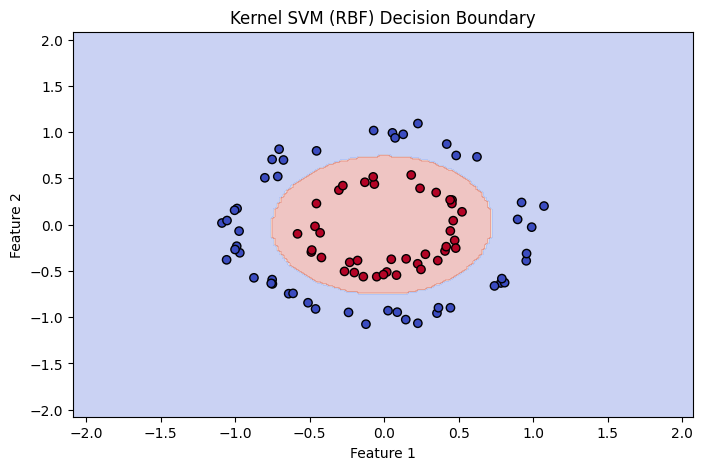

In [6]:
# Plot decision boundary for kernel SVM
plot_decision_boundary(svc_rbf, X_test, y_test, 'Kernel SVM (RBF) Decision Boundary')

In [7]:
# Evaluate kernel SVM
print('Accuracy:', accuracy_score(y_test, y_pred))
print('\nConfusion Matrix:\n', confusion_matrix(y_test, y_pred))
print('\nClassification Report:\n', classification_report(y_test, y_pred))

Accuracy: 1.0

Confusion Matrix:
 [[50  0]
 [ 0 40]]

Classification Report:
               precision    recall  f1-score   support

           0       1.00      1.00      1.00        50
           1       1.00      1.00      1.00        40

    accuracy                           1.00        90
   macro avg       1.00      1.00      1.00        90
weighted avg       1.00      1.00      1.00        90

